<a href="https://colab.research.google.com/github/NARAYANAN0101/MACHINE-LEARNING/blob/main/confusion_matrix_larger_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
dataset=pd.read_csv("/content/fraudTest.csv")
dataset = dataset.dropna()

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20380 entries, 0 to 20379
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             20380 non-null  int64  
 1   trans_date_trans_time  20380 non-null  object 
 2   cc_num                 20380 non-null  float64
 3   merchant               20380 non-null  object 
 4   category               20380 non-null  object 
 5   amt                    20380 non-null  float64
 6   first                  20380 non-null  object 
 7   last                   20380 non-null  object 
 8   gender                 20380 non-null  object 
 9   street                 20380 non-null  object 
 10  city                   20380 non-null  object 
 11  state                  20380 non-null  object 
 12  zip                    20380 non-null  float64
 13  lat                    20380 non-null  float64
 14  long                   20380 non-null  float64
 15  city_po

In [6]:
independet=dataset.select_dtypes(exclude=['object']).drop(['Unnamed: 0'],axis=1)
dependent=dataset[["is_fraud"]]

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independet,dependent,test_size=0.30,random_state=42)

In [8]:
y_test

,is_fraud
7584,0.0
6480,0.0
13396,0.0
13641,0.0
6355,0.0
...,...
2203,0.0
3445,0.0
6307,0.0
19088,0.0


In [9]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [10]:
y_pred=classifier.predict(x_test)

In [11]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [13]:
cm

array([[6087,    0],
       [   0,   27]])

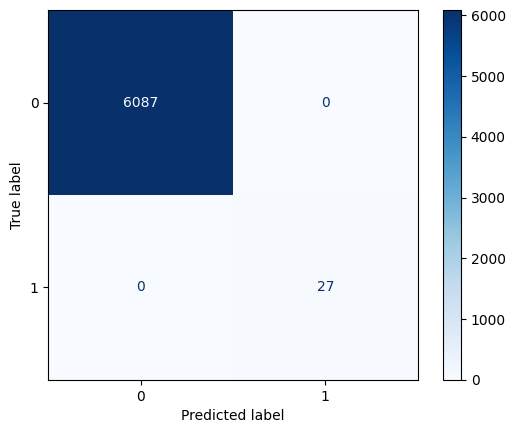

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Accuracy: 1.00
